In [1]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [2]:
df=pd.read_csv(r'C:\Users\apltk\OneDrive\Рабочий стол\imdb_top_1000.csv')
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df=df.drop(columns='Poster_Link')
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [4]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.3+ KB


In [6]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [9]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)
df['Gross'] = df['Gross'].astype(int)

In [10]:
data=df[['IMDB_Rating','Meta_score','No_of_Votes','Gross']]

In [12]:
data

,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,9.3,80.0,2343110,28341469
1,9.2,100.0,1620367,134966411
2,9.0,84.0,2303232,534858444
3,9.0,90.0,1129952,57300000
4,9.0,96.0,689845,4360000
...,...,...,...,...
995,7.6,76.0,166544,0
996,7.6,84.0,34075,0
997,7.6,85.0,43374,30500000
998,7.6,78.0,26471,0


In [13]:
data.corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.268531,0.494979,0.082381
Meta_score,0.268531,1.000000,-0.018507,-0.053659
No_of_Votes,0.494979,-0.018507,1.000000,0.602128
Gross,0.082381,-0.053659,0.602128,1.000000


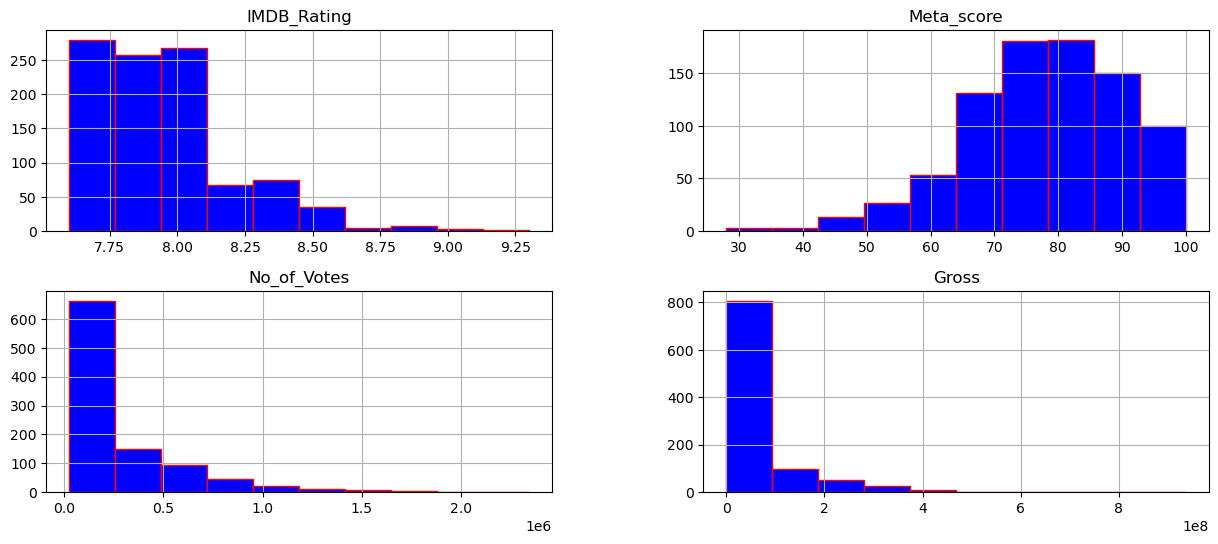

In [14]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

In [18]:
#Top directors by number of films in the top 1000, divided by earnings
directors=df['Director'].value_counts()
top_dir=directors.head(5).index
top_dir

Index(['Alfred Hitchcock', 'Steven Spielberg', 'Hayao Miyazaki',
       'Martin Scorsese', 'Akira Kurosawa'],
      dtype='object', name='Director')

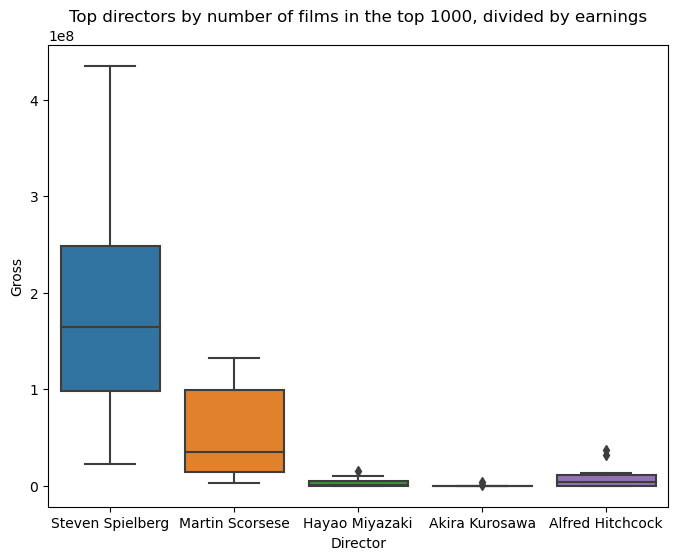

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Director', y='Gross', data=df[df['Director'].isin(top_dir)])
plt.title('Top directors by number of films in the top 1000, divided by earnings')
plt.xlabel('Director')
plt.ylabel('Gross')
plt.show()